<h1>Univariate Linear Regression</h1>
<h2>Any linear regression problem can be solved by two methods</h2>
<ol>
<li>Ordinary Least Squares(OLS)</li>
<li>Gradient Descent</li>

</ol>

<p>Firstly we'll solve using OLS technique which has got some formulas</p>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df=pd.read_csv(r"C:\Users\acer\Desktop\Machine_learning\data_files\prediction.csv")

In [82]:
df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


<Axes: xlabel='area', ylabel='prices'>

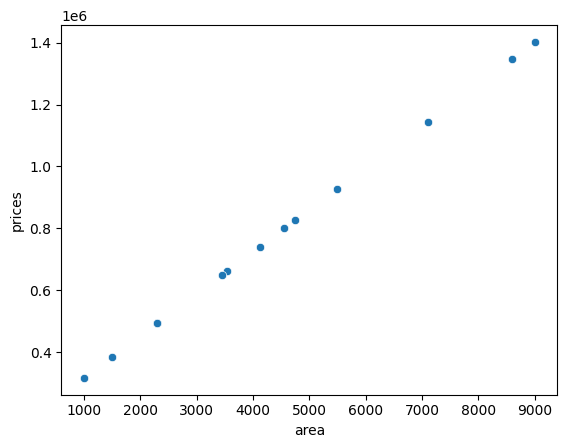

In [83]:
sns.scatterplot(data=df,x='area',y='prices')

<p>Firstly let's use inbuilt functions to find the parameters</p>

In [84]:
from sklearn import linear_model

In [85]:
type(df[["area"]])

pandas.core.frame.DataFrame

In [86]:
reg=linear_model.LinearRegression()#create linear regression object
reg.fit(df[["area"]],df[["prices"]])#train model

LinearRegression()

In [87]:
pred=reg.predict([[3300]])
print(pred)

[[628715.75342466]]


c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
#predicted value for true values
reg.predict(df[['area']])

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [89]:
#the fit curve is a straight line ie theta_not + theta_1*x
theta_not=reg.intercept_
theta_one=reg.coef_
print(theta_not,theta_one)

[180616.43835616] [[135.78767123]]


<Axes: xlabel='area', ylabel='prices'>

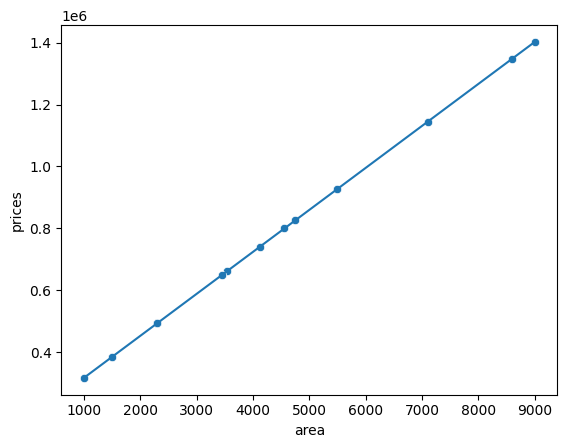

In [90]:
#to actually see the line plot that was predicted
sns.scatterplot(data=df,x='area',y='prices')
sns.lineplot(data=df,x='area',y=reg.predict(df[['area']]).ravel())

<p>This was a perfectly linear dataset so the regression line completely fitted in all the points </p>

Now let's obtain the same result using OLS method 


For more clarity we'll make a class for this

In [91]:
class LinearRegression:
    def __init__(self):
        self.thetas=np.zeros(2)
        

    def fit(self, x_train, y_train):
        x_mean=np.mean(x_train)
        y_mean=np.mean(y_train)
        num=np.sum((x_train-x_mean)*(y_train-y_mean))
        den=np.sum((x_train-x_mean)**2)
        

        self.thetas[1]=num/den
        self.thetas[0]=y_mean-self.thetas[1]*x_mean
        print("Model trained, The parameters are:",self.thetas[0]," and ",self.thetas[1])
    def predict(self,x_test):
        return self.thetas[0]+self.thetas[1]*x_test

    

In [92]:
df=pd.read_csv(r"C:\Users\acer\Desktop\Machine_learning\data_files\placement.csv")

In [93]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [94]:
x=df[['cgpa']].values

In [95]:
y=df[['package']].values

The best practice is to divide the dataset into test train and validation.For now we'll divide into train and test

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [97]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


In [98]:
lr=LinearRegression()
lr.fit(x_train,y_train)

Model trained, The parameters are: -0.8961119222429144  and  0.557951973425072


Now doing the same task using sklearn

In [99]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train) ##for first para need 2d array

LinearRegression()

In [100]:
print(reg.intercept_)
print(reg.coef_)

[-0.89611192]
[[0.55795197]]


The parameters matches perfectly


Now form test data


In [101]:
y_pred=lr.predict(x_test)

In [102]:
y_pred

array([[3.89111601],
       [3.09324469],
       [2.38464568],
       [2.57434935],
       [1.6537286 ],
       [1.77647803],
       [2.07219258],
       [2.93143862],
       [3.76278706],
       [2.93701814],
       [4.09197872],
       [3.51170867],
       [2.97049525],
       [2.40138424],
       [3.18809652],
       [3.46707251],
       [1.94386362],
       [3.24389172],
       [2.97607477],
       [3.41685683],
       [2.55761079],
       [3.16577844],
       [2.85890486],
       [3.12114229],
       [3.68467378],
       [2.8700639 ],
       [3.49497011],
       [3.34432308],
       [3.91901361],
       [1.96060218],
       [3.65119666],
       [3.2104146 ],
       [3.74046898],
       [2.7863711 ],
       [2.78079158],
       [3.27178932],
       [3.52844723],
       [2.61340599],
       [2.65804215],
       [2.71383735]])

Now lets evaluate our model

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


Secondly,We'll do it using Gradient Descent

In [105]:
class gradient_descent:
    def __init__(self,lr,epochs):
        self.thetas=np.zeros(2)
        self.lr=lr
        self.epochs=epochs
        self.mse_losses=[]
    
    def mse_loss(self,y_pred,y_train):
        m=len(y_train)
        return np.sum((y_pred-y_train)**2)*1/(2*m) 
    def fit(self, x_train, y_train):
        for i in range(self.epochs):
            y_pred=self.thetas[0]+self.thetas[1]*x_train
            self.mse_losses.append(self.mse_loss(y_pred,y_train))
            m=len(x_train)
            grad_0=np.sum(y_pred-y_train)*1/m
            grad_1=np.sum((y_pred-y_train)*x_train)*1/m

            self.thetas[0]=self.thetas[0]-self.lr*grad_0
            self.thetas[1]=self.thetas[1]-self.lr*grad_1

        print("Model trained, The parameters are:",self.thetas[0]," and ",self.thetas[1])


    def predict(self,x_test):
        return self.thetas[0]+self.thetas[1]*x_test
        



In [106]:
gd=gradient_descent(lr=0.001,epochs=1000)
gd.fit(x_train,y_train)

Model trained, The parameters are: 0.038335187322526665  and  0.4272406768677356


In [107]:
y_pred=gd.predict(x_test)

Check metrics

In [108]:
print("mean_squared_error",mean_squared_error(y_test,y_pred))

mean_squared_error 0.16045288384318443


See the learning curve

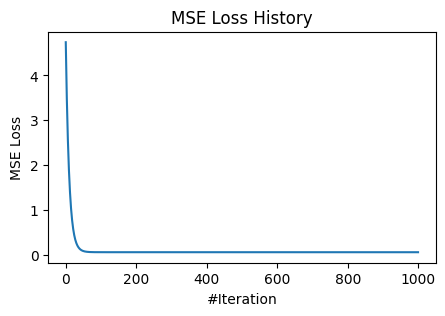

In [109]:
# Plotting Learning Curve
loss_history = gd.mse_losses
plt.figure(figsize=(5, 3))
sns.lineplot(loss_history)
plt.title("MSE Loss History")
plt.xlabel("#Iteration")
plt.ylabel("MSE Loss")
plt.show()

<Axes: xlabel='cgpa', ylabel='package'>

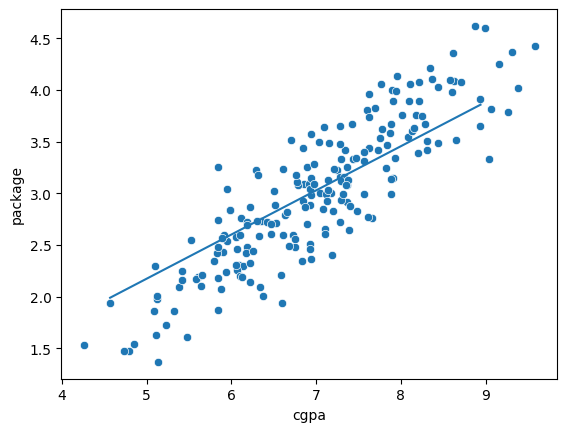

In [110]:
sns.scatterplot(data=df,x='cgpa',y='package')
sns.lineplot(x=x_test.ravel(),y=y_pred.ravel())

Now using gradient descent inbuilt function

In [111]:
from sklearn.linear_model import SGDRegressor

In [112]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [113]:
x_test

array([[8.58],
       [7.15],
       [5.88],
       [6.22],
       [4.57],
       [4.79],
       [5.32],
       [6.86],
       [8.35],
       [6.87],
       [8.94],
       [7.9 ],
       [6.93],
       [5.91],
       [7.32],
       [7.82],
       [5.09],
       [7.42],
       [6.94],
       [7.73],
       [6.19],
       [7.28],
       [6.73],
       [7.2 ],
       [8.21],
       [6.75],
       [7.87],
       [7.6 ],
       [8.63],
       [5.12],
       [8.15],
       [7.36],
       [8.31],
       [6.6 ],
       [6.59],
       [7.47],
       [7.93],
       [6.29],
       [6.37],
       [6.47]])

In [114]:
print(sgd.intercept_)
print(sgd.coef_)
y_pred = sgd.predict(x_test.reshape(-1,1))

# for checking its accuracy

print("mean_squared_error",mean_squared_error(y_test,sgd.predict(x_test)))


[-0.01425112]
[0.42563709]
mean_squared_error 0.15738565068501198


<Axes: xlabel='cgpa', ylabel='package'>

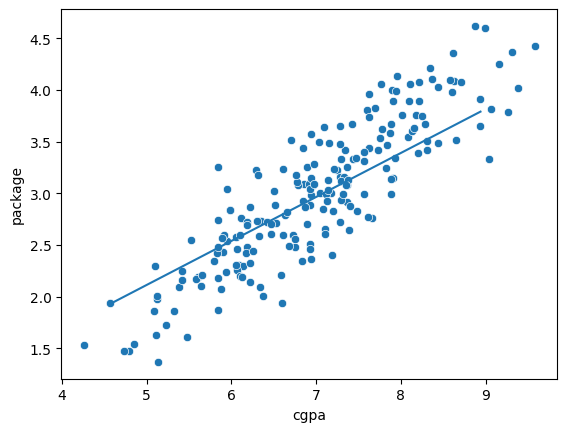

In [115]:
sns.scatterplot(data=df,x='cgpa',y='package')
sns.lineplot(x=x_test.ravel(),y=y_pred.ravel())

It works using schastic gradient descent
so answer doesnt match very slightly